In [44]:
import math
import random
import numpy as np
import time
from numpy import polymul, pad, matmul
from numpy.fft import rfft, irfft, rfftn, irfftn, rfft2, irfft2, fft, fft2, ifft2
import math
from statistics import median
import subprocess
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [19]:
def generate_instance(left_bound, right_bound, num_int, target, out_filename, seed=None, verbose=False):
    if seed is not None:
        random.seed(seed)
    
    if verbose:
        print(f"Generating a set with {num_int} elements and target {target}...")
    set_ = random.sample(range(left_bound, right_bound+1), num_int) # set of integers
    if verbose:
        print("Sorting...")
    set_.sort()
    
#     if target > sum(set_):
#         print("--------------------------------------------------------------------------------")
#         print(f"Warning! Target {target} is unfeasible since it's too large (set sum is {sum(set_)})!")
#         print(f"Callback parameters: left_bound={left_bound}, right_bound={right_bound}, num_int={num_int}, target={target}, seed={seed}")
    
    with open(out_filename, 'w', encoding='utf-8') as fout:
        fout.write(' '.join(list(map(str, set_))))
        fout.write('\n')
        fout.write(str(target))
    if verbose:
        print("Done")
    return set_, target

# TEST
instance = generate_instance(left_bound=1000, right_bound=10000, num_int=100, target=10000, out_filename="cpp_implementations/input.txt")   

Run c++ code

In [13]:
# run cpp implementation of the algorithm 
def run_cpp_impl(alg_name, 
                 num_experiments,
                 exe_path = "x64\Release\cpp_implementations.exe",
                 alg_fin_path = "cpp_implementations\input.txt",
                 alg_fout_path = "cpp_implementations\output.txt",
                 verbose=False):
    if verbose:
        print(f"Running {alg_name}'s algorithm...")
    run = subprocess.run([exe_path, alg_fin_path, alg_fout_path, alg_name, str(num_experiments)])
    
    if run.returncode == 0:
        with open(alg_fout_path) as fout:
            res = fout.readline()
            time = fout.readline()
        if verbose:
            print(f"Done. Solution: {res}\n Time: {time}\n")
        return int(res), float(time)
    else:
        print("Error!")
        return None
# res = run_cpp_impl("bringmann", 1)  

In [65]:
bellman_solutions = []
bellman_times = []
bringmann_solutions = []
bringmann_times = []
params = range(100, 1900, 200)

for param in params:
    right_bound = param*10
    num_int = param
    target = 10*param 
    
    generate_instance(left_bound=1,
                      right_bound=right_bound,
                      num_int=num_int,
                      target=target, 
                      out_filename="cpp_implementations/input.txt",
                      verbose=True)
    
    bellman_times.append(run_cpp_impl("bellman", 1,
                                      alg_fin_path="cpp_implementations/input.txt", verbose=True)[1])
    bringmann_times.append(run_cpp_impl("bringmann", 1,
                                      alg_fin_path="cpp_implementations/input.txt", verbose=True)[1])
bellman_times
bringmann_times

Generating a set with 100 elements and target 1000...
Sorting...
Done
Running bellman's algorithm...
Done. Solution: 1

 Time: 0.1434


Running bringmann's algorithm...
Done. Solution: 1

 Time: 75.9534


Generating a set with 300 elements and target 3000...
Sorting...
Done
Running bellman's algorithm...
Done. Solution: 1

 Time: 2.0405


Running bringmann's algorithm...
Done. Solution: 1

 Time: 425.944


Generating a set with 500 elements and target 5000...
Sorting...
Done
Running bellman's algorithm...
Done. Solution: 1

 Time: 3.9181


Running bringmann's algorithm...
Done. Solution: 1

 Time: 1454.28


Generating a set with 700 elements and target 7000...
Sorting...
Done
Running bellman's algorithm...
Done. Solution: 1

 Time: 7.4211


Running bringmann's algorithm...
Done. Solution: 1

 Time: 2408.4


Generating a set with 900 elements and target 9000...
Sorting...
Done
Running bellman's algorithm...
Done. Solution: 1

 Time: 37.4738


Running bringmann's algorithm...
Done. Solut

[75.9534, 425.944, 1454.28, 2408.4, 3966.3, 6597.11, 12742.0, 37804.2, 52292.8]

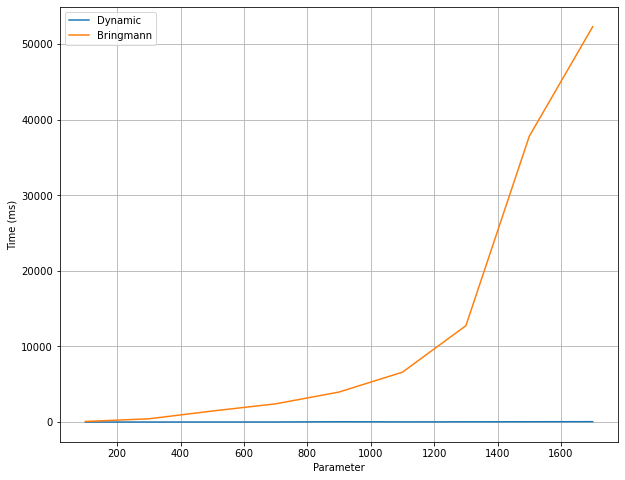

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(params, bellman_times, color="tab:blue", label="Dynamic")
ax.plot(params, bringmann_times, color="tab:orange", label="Bringmann")

ax.set_xlabel("Parameter")
ax.set_ylabel("Time (ms)")
ax.grid()
ax.legend()
plt.show()

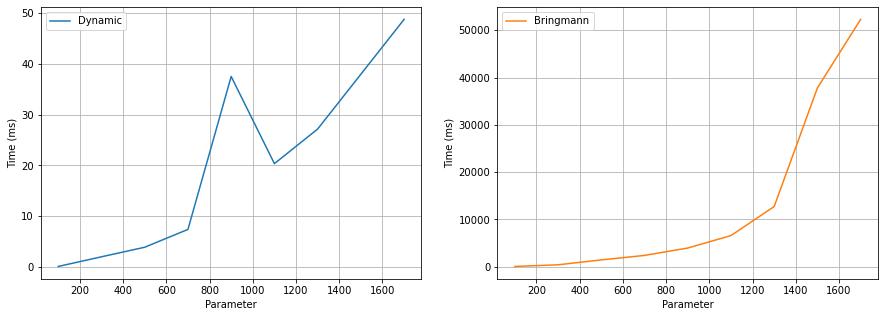

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(params, bellman_times, color="tab:blue", label="Dynamic")
ax[0].set_xlabel("Parameter")
ax[0].set_ylabel("Time (ms)")
ax[0].grid()
ax[0].legend()

ax[1].plot(params, bringmann_times, color="tab:orange", label="Bringmann")
ax[1].set_xlabel("Parameter")
ax[1].set_ylabel("Time (ms)")
ax[1].grid()
ax[1].legend()

plt.show()